# Mushroom

The goal of this dataset is to classify between edible (e) to poisonous (p) mushrooms.This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushroom.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.shape   #checking te data dimensiion

(8124, 23)

In [5]:
df.dtypes   #checking the data types of each column

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

As we have all the column in object data types so we have to change them in numeric form.

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [8]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


As we can see that all our data is now transform in numeric form, so now we can do the analysis and use the classification model.

In [9]:
#checking statistical summary
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so we remove it.

In [10]:
df=df.drop(["veil-type"],axis=1)

In [11]:
#checking the null values in the dataset
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

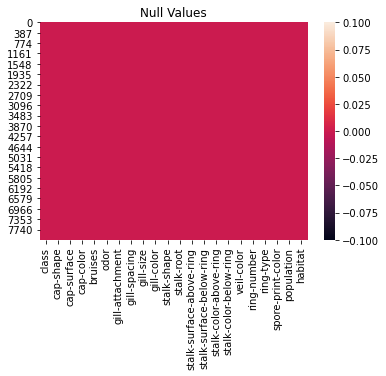

In [12]:
#checking the null values in dataset by using heatmap
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

as we can see there is no white lines in heatmap and the sum of null values in each colum of the dataset is 0. So there is no null values in the dataset

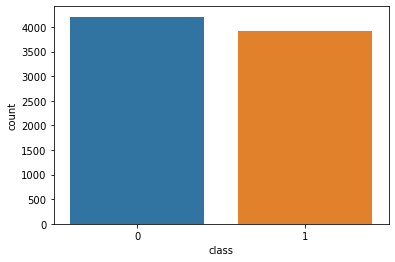

In [13]:
sns.countplot(x='class',data=df)
plt.show()

As we see through the above graph, there is slightly more number of edible mushrooms in the dataset.

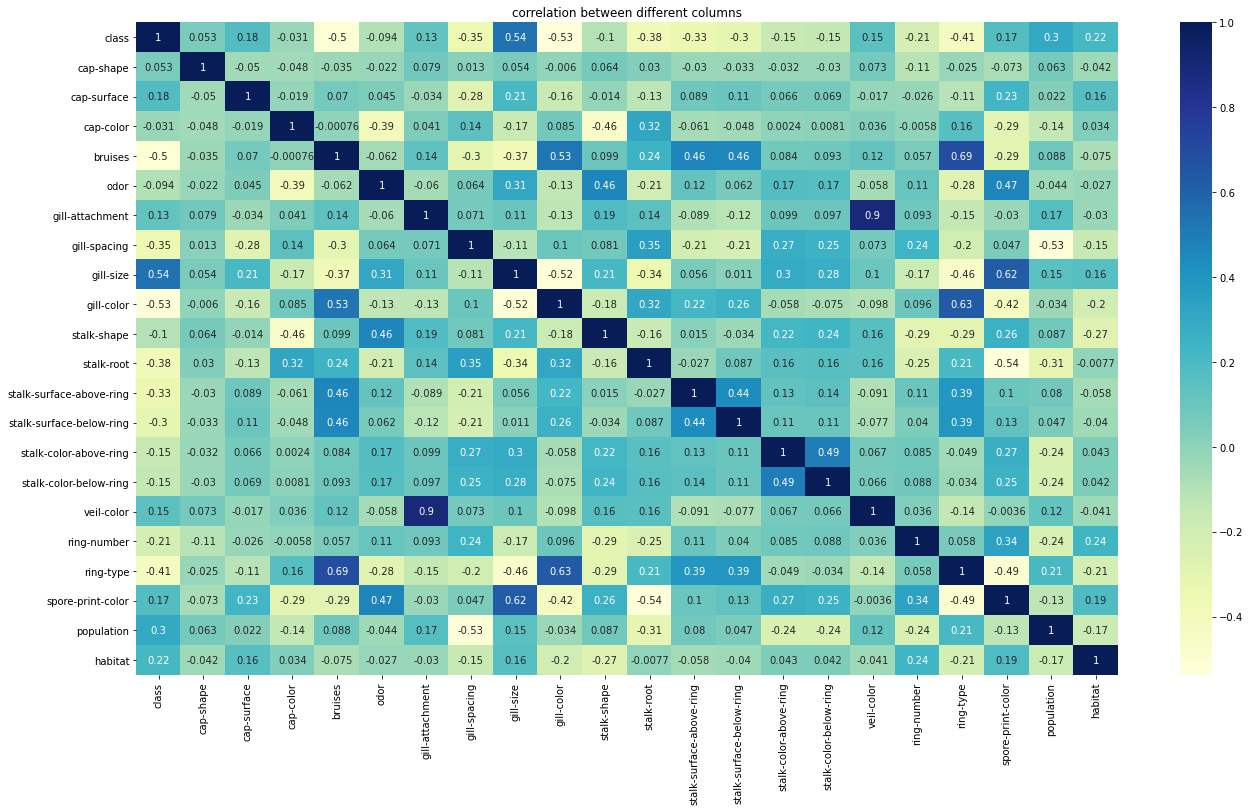

In [14]:
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="YlGnBu",annot=True)
plt.title('correlation between different columns')
plt.show()

In [15]:
#defining corr between every column to the target column

corr_matrix=df.corr()
corr_matrix['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

Through the heatmap and the correlation matrix, we can see that 'gill-size' is the most highly positive correlated column with the target column i.e. 'class'.
The 'gill-color' column is the most highly negative correlated column with the target column i.e. 'class'.

Checking skewness

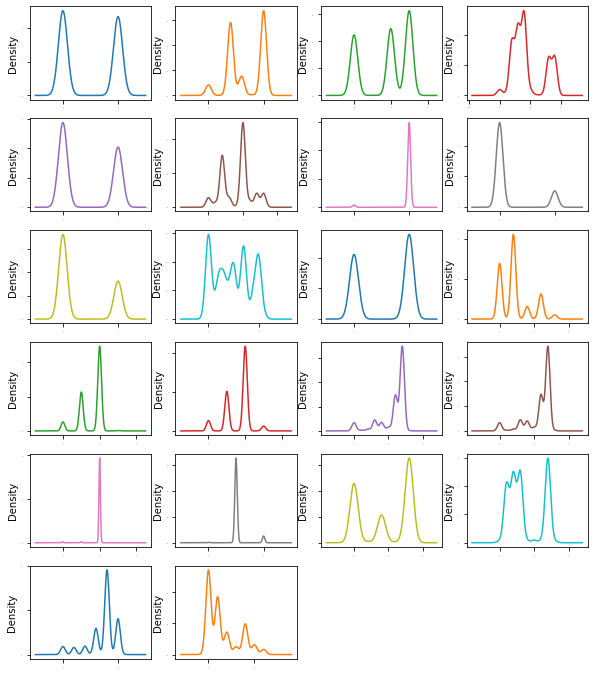

In [16]:
df.plot(kind='density',subplots=True,  layout=(6,4), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

In [17]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

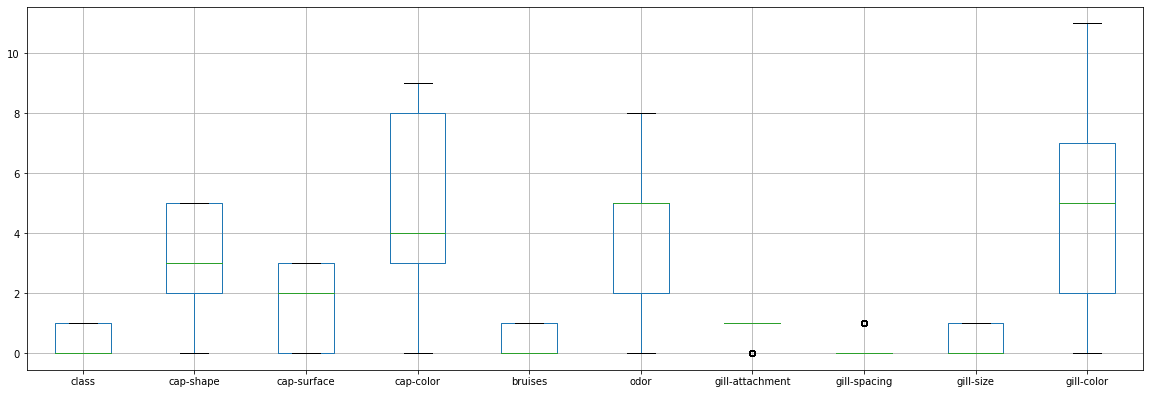

In [18]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

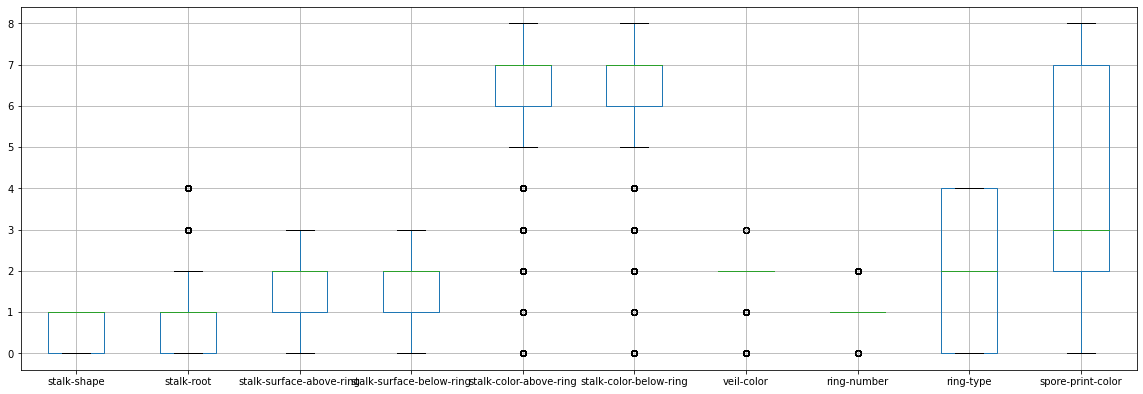

In [19]:
#checking the outliers
df.iloc[:,10:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

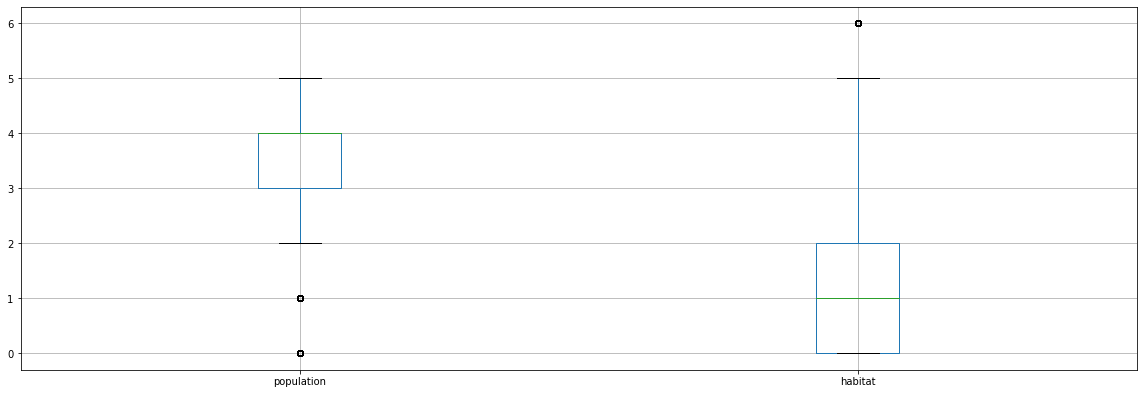

In [20]:
#checking the outliers
df.iloc[:,20:24].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

As we can see that there are outliers in some columns.

As this is a class imbalance problem, so we don't have to remove skewness and outliers from the dataset

In [21]:
#splitting the dataset into independent and target variables in x and y respectively

x=df.drop('class', axis=1)
y=df['class']

In [22]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


In [23]:
y=pd.DataFrame(y,columns=['class'])

In [24]:
y

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [25]:
#finding best random state
maxscore=0
maxrs=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    score=accuracy_score(preddtc,y_test)
    if score>maxscore:
        maxscore=score
        maxrs=i
print('best score is ',maxscore,'on random state is',i)

best score is  1.0 on random state is 299


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=299)

Testing the best Random State in different algorithms

In [27]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score is :',accuracy_score(pred,y_test))
print('confusion matrix',confusion_matrix(pred,y_test))
print('classification report',classification_report(pred,y_test))

accuracy score is : 0.9483076923076923
confusion matrix [[794  53]
 [ 31 747]]
classification report               precision    recall  f1-score   support

           0       0.96      0.94      0.95       847
           1       0.93      0.96      0.95       778

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [28]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score is :',accuracy_score(pred,y_test))
print('confusion matrix',confusion_matrix(pred,y_test))
print('classification report',classification_report(pred,y_test))

accuracy score is : 1.0
confusion matrix [[825   0]
 [  0 800]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       825
           1       1.00      1.00      1.00       800

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [29]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score is :',accuracy_score(pred,y_test))
print('confusion matrix',confusion_matrix(pred,y_test))
print('classification report',classification_report(pred,y_test))

accuracy score is : 1.0
confusion matrix [[825   0]
 [  0 800]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       825
           1       1.00      1.00      1.00       800

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [30]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print('accuracy score is :',accuracy_score(pred,y_test))
print('confusion matrix',confusion_matrix(pred,y_test))
print('classification report',classification_report(pred,y_test))

accuracy score is : 1.0
confusion matrix [[825   0]
 [  0 800]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       825
           1       1.00      1.00      1.00       800

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [31]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score is :',accuracy_score(pred,y_test))
print('confusion matrix',confusion_matrix(pred,y_test))
print('classification report',classification_report(pred,y_test))

accuracy score is : 0.9876923076923076
confusion matrix [[825  20]
 [  0 780]]
classification report               precision    recall  f1-score   support

           0       1.00      0.98      0.99       845
           1       0.97      1.00      0.99       780

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



Now checking cross_val_score

In [32]:
scrlg=cross_val_score(lg,x,y, cv=5)
print('cross validation score of logisticregression: ',scrlg.mean())

cross validation score of logisticregression:  0.8400878363016295


In [33]:
scrrf=cross_val_score(rf,x,y, cv=5)
print('cross validation score of randomforestclassifier: ',scrrf.mean())

cross validation score of randomforestclassifier:  0.8987881015536188


In [34]:
scrdtc=cross_val_score(dtc,x,y, cv=5)
print('cross validation score of decisiontree classifier: ',scrdtc.mean())

cross validation score of decisiontree classifier:  0.9197192876089428


In [35]:
scrada=cross_val_score(ada,x,y, cv=5)
print('cross validation score of adaboostclassifier: ',scrada.mean())

cross validation score of adaboostclassifier:  0.9172607805987116


In [36]:
scrsvc=cross_val_score(svc,x,y, cv=5)
print('cross validation score of SVC: ',scrsvc.mean())

cross validation score of SVC:  0.8420306934444864


Minimum difference in accuracy score and cross validation score is for decision tree classifier and adaboost classifier (8) so they are our best model

We are using decision tree classifier

Doing GridSearchCV for getting best parameters

In [37]:
#creating parameter list to pass in GridSearchCV
parameters= {'criterion': ['gini','entropy'],
             'splitter': ['best','random'],}
             
        

In [39]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [40]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [41]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [42]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [43]:
accuracy_score(GCV_pred,y_test)

1.0

In [44]:
joblib.dump(GCV.best_estimator_,'mushroom_dtc.pkl')

['mushroom_dtc.pkl']